In [1]:
import uproot
import glob
import matplotlib

import numpy             as np
import ipywidgets        as widgets
import matplotlib.pyplot as plt
import awkward           as ak

from IPython.display import display
from tqdm            import tqdm

# Wider Cells
from IPython.display import display, HTML, Markdown
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

In [2]:
plt.tight_layout()
matplotlib.rcParams['figure.figsize'] = (12, 8)
font = {'size'   : 16}
matplotlib.rc('font', **font)
plt.rcParams["legend.markerscale"] = 3

<Figure size 432x288 with 0 Axes>

In [3]:
run = 515
file_select = widgets.Dropdown(layaout={'width': 'initial'}, options=glob.glob(f"/eos/experiment/wcte/data/readout_commissioning/offline/dataR{run}S*P*.root"))

print("Choose a file:")
display(file_select)

Choose a file:


Dropdown(options=('/eos/experiment/wcte/data/readout_commissioning/offline/dataR515S0P0.root', '/eos/experimen…

In [4]:
root_file = uproot.open(file_select.value)

In [5]:
root_file.keys()

['WCTEReadoutWindows;55', 'WCTEReadoutWindows;54']

In [6]:
tree = root_file["WCTEReadoutWindows"]

In [7]:
for k, v in tree.items():
    print(f"{k:<30} {v.array().type}")

window_time                    45807 * float64
run_id                         45807 * int32
sub_run_id                     45807 * int32
spill_counter                  45807 * int32
event_number                   45807 * int32
trigger_types                  45807 * var * int32
trigger_times                  45807 * var * float32
led_gains                      45807 * var * float32
led_dacsettings                45807 * var * float32
led_ids                        45807 * var * int32
hit_mpmt_card_ids              45807 * var * int32
hit_pmt_channel_ids            45807 * var * int32
hit_mpmt_slot_ids              45807 * var * int32
hit_pmt_position_ids           45807 * var * int32
hit_pmt_charges                45807 * var * float32
hit_pmt_times                  45807 * var * float32
pmt_waveform_mpmt_card_ids     45807 * var * int32
pmt_waveform_pmt_channel_ids   45807 * var * int32
pmt_waveform_mpmt_slot_ids     45807 * var * int32
pmt_waveform_pmt_position_ids  45807 * var * int3

In [8]:
len(tree['hit_pmt_times'].array()[0])

864621

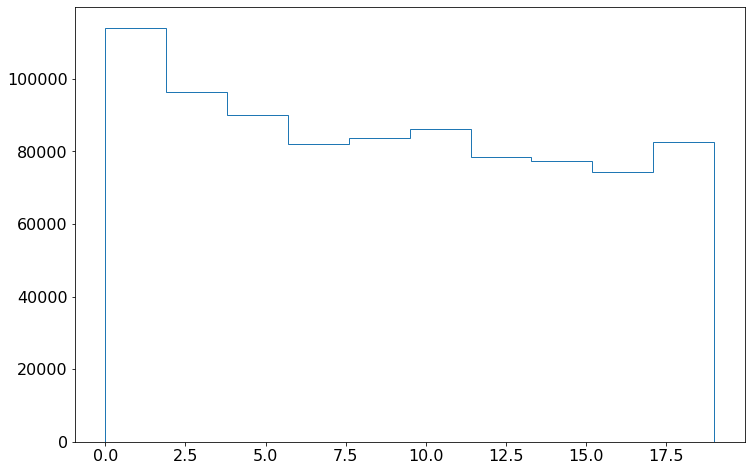

In [9]:
plt.hist(tree['hit_pmt_channel_ids'].array()[0], histtype='step');

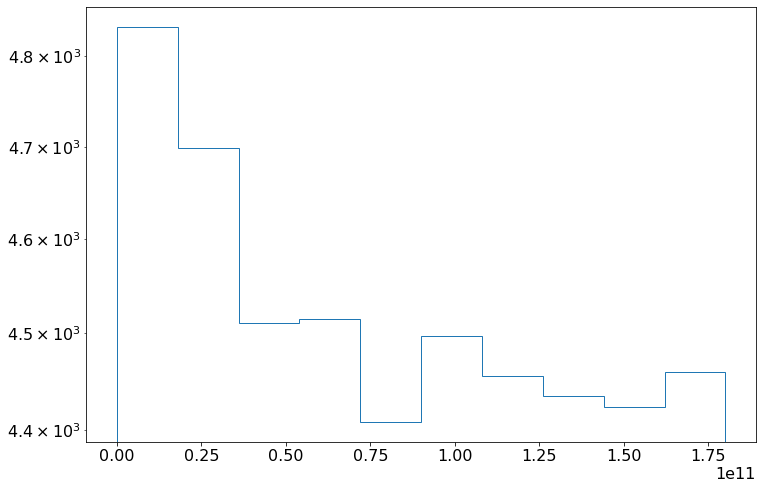

In [10]:
upper_limit = 45236
window_time = tree['window_time'].array() 
plt.hist(window_time[:upper_limit], histtype='step');
plt.yscale('log')

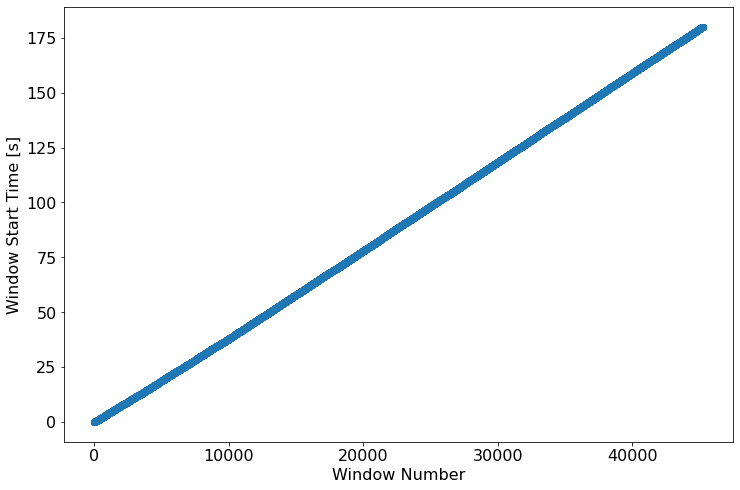

In [11]:
x = np.arange(0, upper_limit, 1)
plt.scatter(x, window_time[:upper_limit]*1e-9);
plt.xlabel("Window Number");
plt.ylabel("Window Start Time [s]");

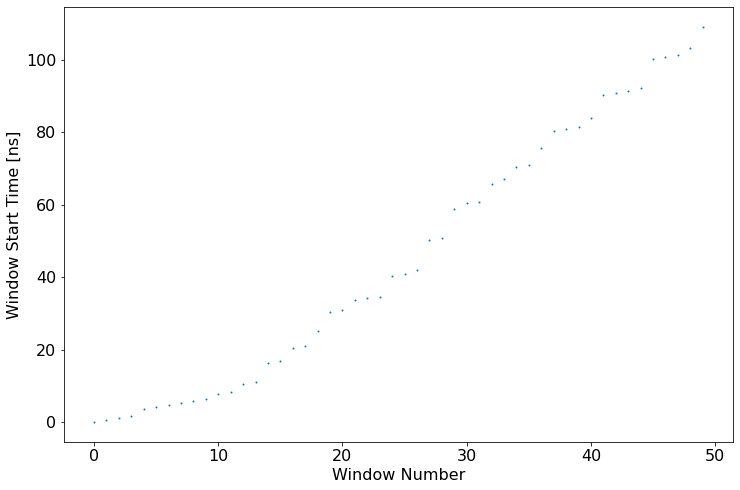

In [12]:
upper_limit = 50
x = np.arange(0, upper_limit, 1)
plt.scatter(x, window_time[:upper_limit]*1e-6, s=1);
plt.xlabel("Window Number");
plt.ylabel("Window Start Time [ns]");

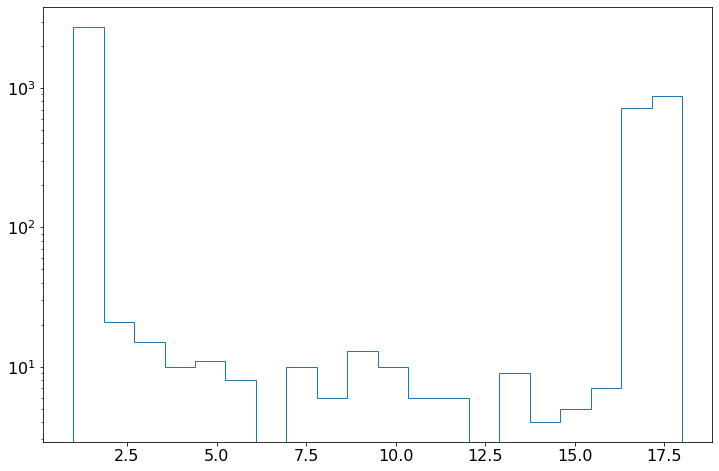

In [13]:
time_diff = []
for i in range(4500):
    time_diff.append((window_time[i+1] - window_time[i])/524288.0)
    
plt.hist(time_diff, histtype='step', bins=20);
plt.yscale('log')

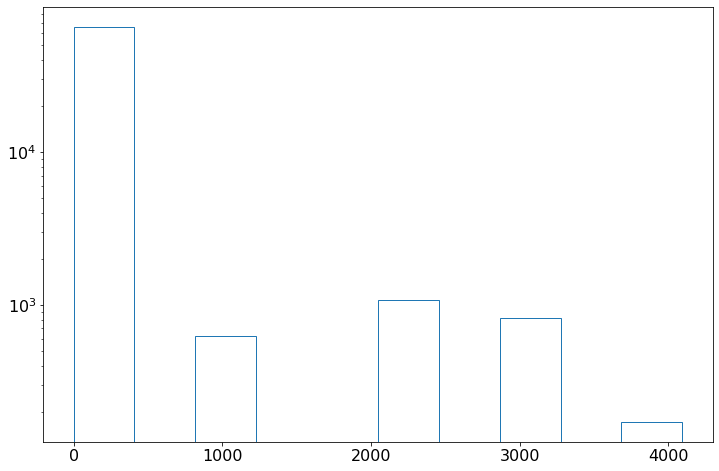

In [14]:
plt.hist(tree['hit_mpmt_card_ids'].array()[1], histtype='step');
plt.yscale('log')

In [42]:
counter = 0
for array in tree.iterate(['event_number', 'hit_mpmt_card_ids'][:2], step_size='1 MB'):
    print(array)
#     # Broadcast the number of events to match the number of hits in every window
#     event_id_batch, card_id_batch = ak.broadcast_arrays(array['event_number'], array['hit_mpmt_card_ids'])
    
#     # DEBUG: Histogram that shows card_id for every batch
#     plt.hist(card_id_batch[0], alpha=0.4, bins=50, label=f"Batch #{counter}")
#     plt.yscale('log')
#     plt.xlabel('Card ID')
#     plt.legend(loc="upper right")
    
#     # DEBUG
#     print(f"Batch {counter}: ")
#     print("event_id_batch:")
#     print(event_id_batch)
#     print("card_id_batch:")
#     print(card_id_batch)
    
#      # Print summary info
#     print(f"Batch of windows {ak.min(array['event_number'])} to {ak.max(array['event_number'])} has {ak.sum(ak.num(card_id_batch))} hits (average {ak.mean(ak.num(card_id_batch))} hits per window)\n")
    
#     # Update hist with event and card_id info and batch counter
#     counter += 1

[{event_number: 0, hit_mpmt_card_ids: [1312, ..., 0]}, {...}, ..., {...}, {...}]
[{event_number: 13192, hit_mpmt_card_ids: [75, ..., 44]}, {...}, ..., {...}]
[{event_number: 26384, hit_mpmt_card_ids: [100, ...]}, {...}, ..., {...}, {...}]
[{event_number: 39576, hit_mpmt_card_ids: [75, ..., 21]}, {...}, ..., {...}]
